In [11]:
from pathlib import Path
from datetime import date
import jsonlines
import matplotlib_inline
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_context('paper')
import pandas as pd

In [12]:
comments = dict()
tbl_activity = []
ctr = 0
for p in sorted(Path("../data").glob("comments-*.jsonl")):
    with jsonlines.open(p) as reader:
        for row in reader:
            ctr += 1
            href = row['href']
            if href in comments:
                comments[href] += 1
            else:
                comments[href] = 1
print(f'found {ctr} comments')

found 440 comments


In [13]:
df_activity = pd.DataFrame.from_dict(comments, orient='index', columns=['nr'])
df_activity.head()

,nr
kiwi:0x65afbba318208e311de30b2232a4d1c99cba15f7cdb33f15e2eb248c3573b9393560a3fa,27
kiwi:0x65b1748bf8e0d6c39f5b5d881edd23203f35c8d021578e567826b08d0895efcf398408c2,3
kiwi:0x65b0e2aac0a295f7deb44a6999be38cd3942b319cd26f83103d7d152a9953a3c8b86eaa6,1
kiwi:0x65b219cc402495243b3fff8b8b150837cf51991911409e7059cdcaf77ce94d683e94a9ca,3
kiwi:0x65b217a0982e0698c1cebebcfee9da55de66e8c9afb23a18faab865947911fa77e706fd1,2


In [14]:
print(f'found {df_activity.shape[0]} stories with comments')

found 208 stories with comments


Distribution of comments per story

<Axes: xlabel='nr', ylabel='count'>

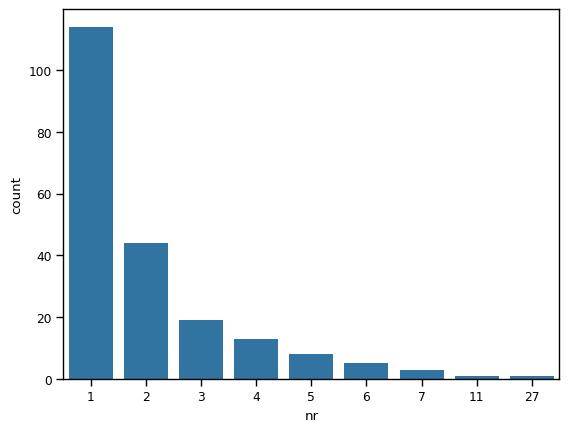

In [15]:
sns.countplot(x='nr', data=df_activity)